In [9]:
from google.colab import files
uploaded = files.upload

In [8]:
import pandas as pd


In [11]:
import pandas as pd
import os

# Set the path to your folder containing the CSV files
folder_path = '/content/drive/MyDrive/Property_data-20250109T054231Z-001/Property_data'  # Replace with the actual folder path

# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize an empty list to store dataframes
dfs = []

# Loop through all CSV files and read them into a list of DataFrames
for file in csv_files:
    try:
        # Try reading the CSV with a different encoding
        df = pd.read_csv(os.path.join(folder_path, file), encoding='ISO-8859-1')
        dfs.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Merge all dataframes into a single dataframe
merged_data = pd.concat(dfs, ignore_index=True)

# Display the shape of the merged dataset
print(merged_data.shape)


(14532, 24)


In [13]:
print(merged_data.columns)


Index(['property_id', 'type', 'activation_date', 'bathroom', 'floor',
       'total_floor', 'furnishing', 'gym', 'latitude', 'longitude',
       'lease_type', 'lift', 'locality', 'parking', 'property_age',
       'property_size', 'swimming_pool', 'pin_code', 'rent', 'deposit',
       'building_type', 'location', 'ÿþ',
       'property_id/type/activation_date/bathroom/floor/total_floor/furnishing/gym/latitude/longitude/lease_type/lift/locality/parking/property_age/property_size/swimming_pool/pin_code/rent/deposit/building_type'],
      dtype='object')


In [32]:
merged_data = merged_data.drop_duplicates()


In [33]:
# Example to standardize columns (assuming you know the correct column names)
standard_columns = ['property_id', 'type', 'activation_date', 'bathroom', 'floor', 'total_floor', 'furnishing', 'gym', 'latitude', 'longitude', 'lease_type', 'lift', 'locality', 'parking', 'property_age', 'property_size', 'swimming_pool', 'pin_code', 'rent', 'deposit', 'building_type', 'location']
merged_data = merged_data[standard_columns]


In [34]:
# Check for missing data
print(merged_data.isnull().sum())

# Optionally, you can drop rows with missing values or fill them
merged_data = merged_data.dropna()  # Or use fillna() for specific columns


property_id          236
type                 236
activation_date      236
bathroom             236
floor                236
total_floor          303
furnishing           236
gym                  236
latitude             236
longitude            236
lease_type           236
lift                 236
locality            1753
parking              236
property_age         236
property_size        236
swimming_pool        236
pin_code             757
rent                 236
deposit              236
building_type        361
location           82548
dtype: int64


In [22]:
# Clean up the column names by renaming the problematic columns
merged_data.columns = merged_data.columns.str.replace('ÿþ', '', regex=False)  # Remove invalid column
merged_data.columns = merged_data.columns.str.replace('property_id/type/activation_date/bathroom/floor/total_floor/furnishing/gym/latitude/longitude/lease_type/lift/locality/parking/property_age/property_size/swimming_pool/pin_code/rent/deposit/building_type', 'property_details', regex=False)  # Rename the long combined column

# Check the cleaned column names
print(merged_data.columns)
print(merged_data.shape)


Index(['property_id', 'type', 'activation_date', 'bathroom', 'floor',
       'total_floor', 'furnishing', 'gym', 'latitude', 'longitude',
       'lease_type', 'lift', 'locality', 'parking', 'property_age',
       'property_size', 'swimming_pool', 'pin_code', 'rent', 'deposit',
       'building_type', 'location', 'property_details'],
      dtype='object')
(14532, 23)


In [23]:
# Load the datasets

photo_data = pd.read_csv('/content/drive/MyDrive/property_photos (1).csv')
interaction_data = pd.read_csv('/content/drive/MyDrive/property_interactions (1).csv')


In [25]:
# Merge property data and photo data on 'property_id'


# Merge the interactions data
merged_data = pd.merge(merged_data, interaction_data[['property_id', 'request_date']], on='property_id', how='left')

# Fill missing values in interactions (e.g., if there were no interactions, set it to 0)
merged_data['interactions'] = merged_data['request_date'].isnull().astype(int)

# Calculate total interactions per property (count of request_date occurrences)
total_interactions = interaction_data.groupby('property_id').size().reset_index(name='total_interactions')

# Merge total interactions into the main dataset
merged_data = pd.merge(merged_data, total_interactions, on='property_id', how='left')


In [36]:
# Check if merged_data is not empty
if len(merged_data) > 0:
    # Example 1: Percentage of properties in 'HSR Layout'
    hsr_layout_properties = merged_data[merged_data['locality'] == 'HSR Layout']
    hsr_layout_percentage = (len(hsr_layout_properties) / len(merged_data)) * 100
    print(f"Percentage of properties in HSR Layout: {hsr_layout_percentage:.2f}%")

    # Example 2: Count of properties with a gym
    gym_properties = merged_data[merged_data['gym'] == 1]
    print(f"Number of properties with a gym: {len(gym_properties)}")

    # Example 3: Count of properties with parking
    parking_properties = merged_data[merged_data['parking'] == 1]
    print(f"Number of properties with parking: {len(parking_properties)}")
else:
    print("The merged_data DataFrame is empty. No calculations can be performed.")


The merged_data DataFrame is empty. No calculations can be performed.


In [37]:
# Save the cleaned data to a new CSV file
merged_data.to_csv('cleaned_property_data.csv', index=False)


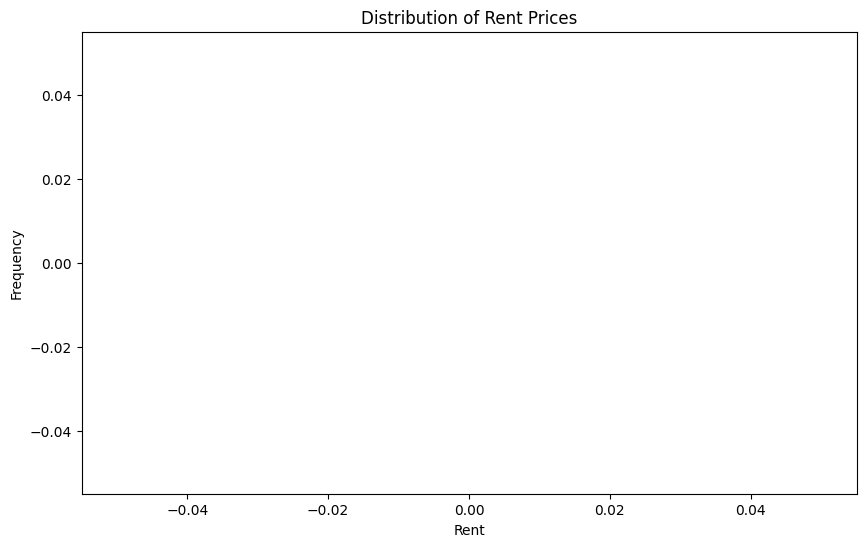

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of rent prices
plt.figure(figsize=(10,6))
sns.histplot(merged_data['rent'], kde=True)
plt.title('Distribution of Rent Prices')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()


In [39]:
import pandas as pd
import os

# Set the path to your folder containing the CSV files
folder_path = '/content/drive/MyDrive/Property_data-20250109T054231Z-001/Property_data'  # Replace with the actual folder path

# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize an empty list to store dataframes
dfs = []

# Loop through all CSV files and read them into a list of DataFrames
for file in csv_files:
    try:
        # Try reading the CSV with a different encoding
        df = pd.read_csv(os.path.join(folder_path, file), encoding='ISO-8859-1')

        # Optional: You can add a print statement to check the first few rows of each file
        print(f"Reading {file}, shape: {df.shape}")

        # Append the DataFrame to the list
        dfs.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Merge all property dataframes into a single dataframe
merged_data = pd.concat(dfs, ignore_index=True)

# Read the photo data and interaction data
photo_data = pd.read_csv('/content/drive/MyDrive/property_photos (1).csv')
interaction_data = pd.read_csv('/content/drive/MyDrive/property_interactions (1).csv')

# Display columns of photo_data and interaction_data to understand their structure
print("Photo Data Columns:", photo_data.columns)
print("Interaction Data Columns:", interaction_data.columns)

# Merge merged_data with photo_data on 'property_id'
merged_data = pd.merge(merged_data, photo_data, on='property_id', how='left')

# Merge merged_data with interaction_data on 'property_id'
merged_data = pd.merge(merged_data, interaction_data, on='property_id', how='left')

# Display the shape of the merged dataset to verify the merge
print(f"Merged Data Shape after merging photo and interaction data: {merged_data.shape}")


Reading Brookefield.csv, shape: (138, 21)
Reading Bommanahalli.csv, shape: (224, 21)
Reading Begur.csv, shape: (155, 21)
Reading Bellandur.csv, shape: (313, 21)
Reading Basavanagudi.csv, shape: (125, 21)
Reading Bilekahalli.csv, shape: (210, 21)
Reading Basaveshwar Nagar.csv, shape: (176, 21)
Reading Arekere.csv, shape: (161, 21)
Reading Akshayanagar.csv, shape: (144, 21)
Reading Banashankari.csv, shape: (487, 21)
Reading JP Nagar.csv, shape: (655, 21)
Reading Indiranagar.csv, shape: (123, 21)
Reading Hulimavu.csv, shape: (206, 21)
Reading Jayanagar.csv, shape: (143, 21)
Reading HSR_Layout.csv, shape: (862, 1)
Reading Hoodi.csv, shape: (166, 21)
Reading Hosakerehalli.csv, shape: (145, 21)
Reading Hongasandra.csv, shape: (156, 21)
Reading Horamavu.csv, shape: (233, 21)
Reading Hebbal.csv, shape: (189, 21)
Reading Gottigere.csv, shape: (143, 21)
Reading Electronic City.csv, shape: (630, 21)
Reading HBR Layout.csv, shape: (171, 21)
Reading Electronics City Phase 1.csv, shape: (132, 21)
Re

In [40]:
print(photo_data['photo_urls'].isnull().sum())


11022


In [41]:
import json
import re

# Clean photo_urls column to extract number of photos
def extract_photo_count(url_str):
    try:
        # Attempt to parse the string as JSON
        photos = json.loads(url_str)
        return len(photos)  # Return number of photos
    except (json.JSONDecodeError, TypeError):
        # Handle cases where the string is not valid JSON or is missing
        return 0  # Return 0 if there's no valid data

# Apply the function to the photo_urls column
photo_data['photo_count'] = photo_data['photo_urls'].apply(extract_photo_count)


In [42]:
print(merged_data.duplicated(subset=['property_id']).sum())
merged_data = merged_data.drop_duplicates(subset=['property_id'])


71490


In [43]:
# Count interactions for each property_id
interaction_counts = interaction_data.groupby('property_id').size().reset_index(name='total_interactions')

# Merge the interaction counts with the main dataset
merged_data = pd.merge(merged_data, interaction_counts, on='property_id', how='left')


In [44]:
print(merged_data[['rent', 'property_size', 'total_interactions']].describe())


               rent  property_size  total_interactions
count  13435.000000   13435.000000        10765.000000
mean   14610.660737     992.357722            7.539155
std     8631.177518     676.653400           10.447613
min     1000.000000       0.000000            1.000000
25%     8500.000000     600.000000            2.000000
50%    13000.000000     950.000000            4.000000
75%    18000.000000    1233.500000            9.000000
max    75000.000000   40000.000000          183.000000


In [45]:
print(merged_data.isnull().sum())


property_id                                                                                                                                                                                                        1
type                                                                                                                                                                                                               1
activation_date                                                                                                                                                                                                    1
bathroom                                                                                                                                                                                                           1
floor                                                                                                                                               

In [46]:
print(merged_data.isnull().sum())


property_id                                                                                                                                                                                                        1
type                                                                                                                                                                                                               1
activation_date                                                                                                                                                                                                    1
bathroom                                                                                                                                                                                                           1
floor                                                                                                                                               

In [47]:
print(merged_data['type'].value_counts())


type
BHK2        6728
BHK3        2792
BHK1        2788
RK1          888
BHK4         210
BHK4PLUS      29
Name: count, dtype: int64


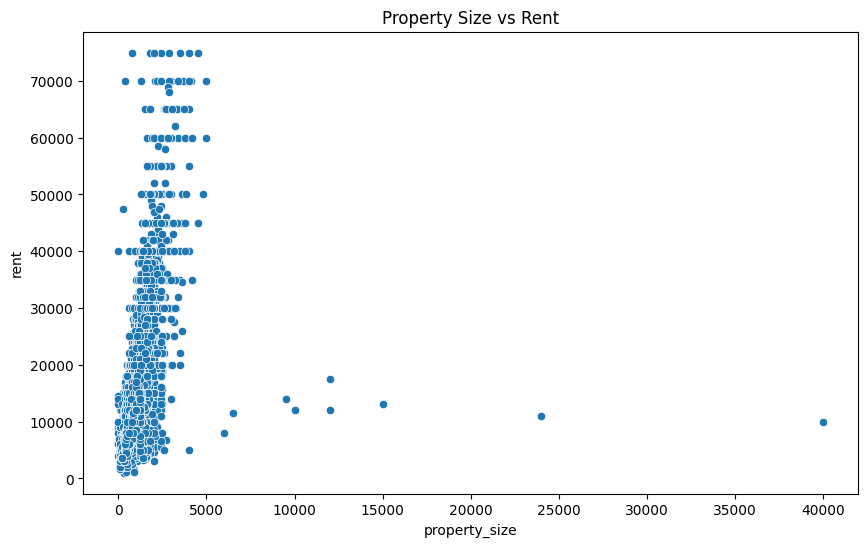

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='property_size', y='rent', data=merged_data)
plt.title("Property Size vs Rent")
plt.show()


In [51]:
# Check if 'photo_count' and 'total_interactions' columns exist in merged_data
if 'photo_count' in merged_data.columns and 'total_interactions' in merged_data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='photo_count', y='total_interactions', data=merged_data)
    plt.title("Interactions vs Number of Photos")
    plt.show()
else:
    print("The required columns 'photo_count' or 'total_interactions' do not exist in the DataFrame.")


The required columns 'photo_count' or 'total_interactions' do not exist in the DataFrame.


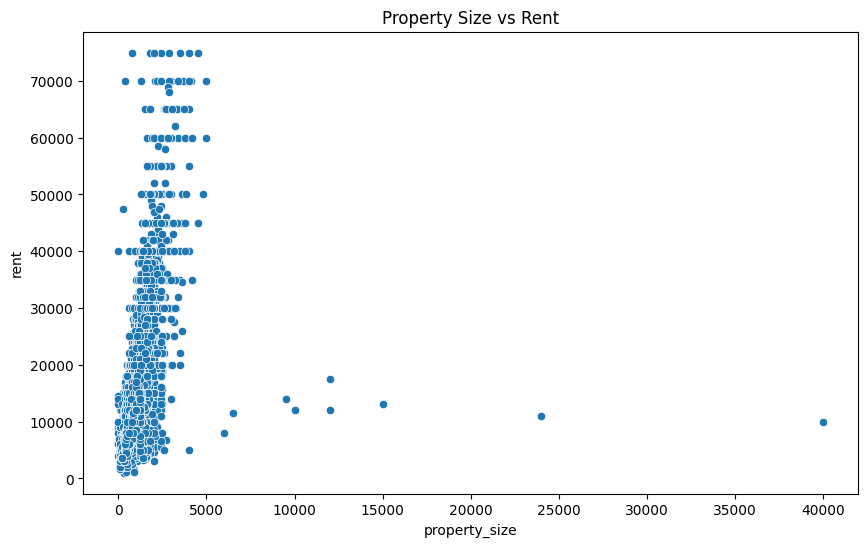

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='property_size', y='rent', data=merged_data)
plt.title("Property Size vs Rent")
plt.show()


In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='photo_count', y='total_interactions', data=merged_data)
plt.title("Interactions vs Number of Photos")
plt.show()


ValueError: Could not interpret value `photo_count` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

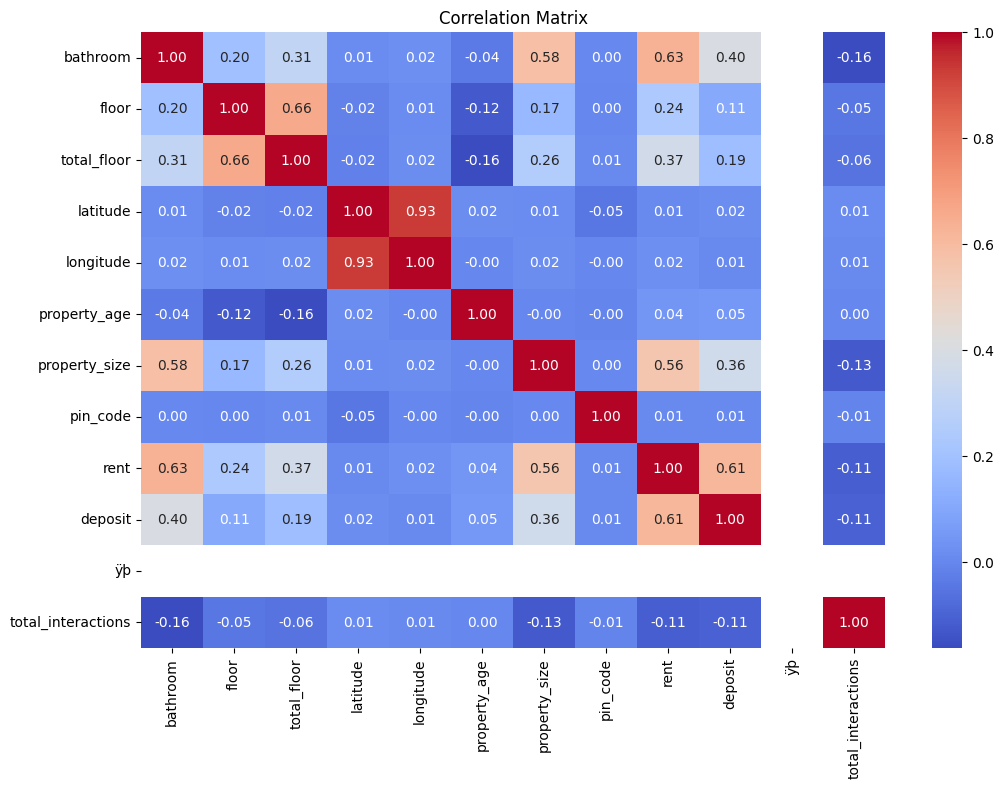

In [55]:
# Select only numeric columns from merged_data
numeric_data = merged_data.select_dtypes(include=['number'])

# Compute the correlation matrix on numeric data
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [56]:
print(merged_data.shape)


(13436, 27)


In [57]:
# Count the total number of properties
total_properties = merged_data.shape[0]

# Count the number of properties in HSR Layout
hsr_layout_properties = merged_data[merged_data['locality'] == 'HSR Layout'].shape[0]

# Calculate the percentage
hsr_layout_percentage = (hsr_layout_properties / total_properties) * 100

# Round the percentage value
print(f"Percentage of properties in HSR Layout: {round(hsr_layout_percentage)}%")


Percentage of properties in HSR Layout: 0%


In [58]:
round((merged_data[merged_data['locality'] == 'HSR Layout'].shape[0] / merged_data.shape[0]) * 100)



0

In [59]:
round((merged_data[merged_data['locality'].str.strip().str.lower() == 'hsr layout'].shape[0] / merged_data.shape[0]) * 100)


0

In [60]:
merged_data['locality'].nunique()


61

In [61]:
# Get the number of unique locations in the 'locality' column
unique_locations = merged_data['locality'].nunique()
print(unique_locations)


61


In [63]:
# Check for any null values in the locality column
print(merged_data['locality'].isnull().sum())

# Display unique locations to verify
print(merged_data['locality'].unique())


225
['Brookefield' nan 'Begur' 'Bellandur' 'Basavanagudi' 'Bilekahalli'
 'Basaveshwar Nagar' 'Arekere' 'Akshayanagar' 'Banashankari' 'JP Nagar'
 'Indiranagar' 'Hulimavu' 'Jayanagar' 'Hoodi' 'Hosakerehalli'
 'Hongasandra' 'Horamavu' 'Hebbal' 'Gottigere' 'Electronic City'
 'HBR Layout' 'Electronics City Phase 1' 'Ejipura' 'BTM 2nd Stage'
 'Doddanekundi' 'Chikkalasandra' 'BTM Layout' 'Yelahanka New Town'
 'Vijaya Nagar' 'Yelahanka' 'Whitefield' 'Vidyaranyapura' 'Subramanyapura'
 'Varthur' 'Sunkadakatte' 'RR Nagar' 'Uttarahalli Hobli' 'Singasandra'
 'Rajaji Nagar' 'Mahadevapura' 'Padmanabhanagar' 'Kumaraswamy Layout'
 'Kengeri Satellite Town' 'Konanakunte' 'Kengeri' 'Thanisandra' 'RT Nagar'
 'Marathahalli' 'Munnekollal' 'Raja Rajeshwari Nagar' 'Mathikere'
 'Nagarbhavi' 'Kadugodi' 'Kaggadasapura' 'Kammanahalli' 'Kasavanahalli'
 'Krishnarajapura' 'Lingarajapuram' 'Kalyan Nagar' 'Ramamurthy Nagar'
 'K.R Puram']


In [64]:
# Get the number of unique locations in the 'locality' column
unique_locations = merged_data['locality'].nunique()
print(unique_locations)


61


In [65]:
# Assuming 'locality' is the column containing location data
unique_locations_count = merged_data['locality'].nunique()
print(f"Number of unique locations: {unique_locations_count}")


Number of unique locations: 61


In [66]:
# Group by 'locality' and calculate the average rent, then find the locality with the highest average rent
highest_avg_rent_locality = merged_data.groupby('locality')['rent'].mean().idxmax()
print(highest_avg_rent_locality)


Bellandur


In [71]:
# Convert 'activation_date' and 'request_date' to datetime with the correct format
merged_data['activation_date'] = pd.to_datetime(merged_data['activation_date'], format='%d-%m-%Y %H:%M', errors='coerce')
interaction_data['request_date'] = pd.to_datetime(interaction_data['request_date'], format='%d-%m-%Y %H:%M', errors='coerce')

# Merge the interaction data with the property data
merged_interactions = pd.merge(merged_data, interaction_data, on='property_id', how='left')

# Check columns in merged_interactions to confirm that 'request_date_x' and 'request_date_y' exist
print("Columns in merged_interactions:", merged_interactions.columns)

# Use 'request_date_y' as the correct column for interaction data
merged_interactions['days_since_activation'] = (merged_interactions['request_date_y'] - merged_interactions['activation_date']).dt.days

# Filter interactions within 7 days of activation
filtered_data = merged_interactions[merged_interactions['days_since_activation'] <= 7]

# Count the number of interactions for each property
interaction_counts = filtered_data.groupby('property_id')['request_date_y'].count()

# Handle cases where no majority interactions are found
if not interaction_counts.empty:
    majority_interactions = interaction_counts.mode()[0]  # Get the mode
    print(majority_interactions)
else:
    print("No interactions found within 7 days")


Columns in merged_interactions: Index(['property_id', 'type', 'activation_date', 'bathroom', 'floor',
       'total_floor', 'furnishing', 'gym', 'latitude', 'longitude',
       'lease_type', 'lift', 'locality', 'parking', 'property_age',
       'property_size', 'swimming_pool', 'pin_code', 'rent', 'deposit',
       'building_type', 'location', 'ÿþ',
       'property_id/type/activation_date/bathroom/floor/total_floor/furnishing/gym/latitude/longitude/lease_type/lift/locality/parking/property_age/property_size/swimming_pool/pin_code/rent/deposit/building_type',
       'photo_urls', 'request_date_x', 'total_interactions', 'request_date_y'],
      dtype='object')
No interactions found within 7 days


In [73]:
# Select only numeric columns
numeric_data = merged_data.select_dtypes(include=['number'])

# Compute the correlation matrix for the numeric columns
correlation_matrix = numeric_data.corr()

# Get the correlation of all features with rent
correlation_with_rent = correlation_matrix['rent'].sort_values(ascending=False)

# Print the feature with the highest correlation
print("Feature with highest correlation with rent:", correlation_with_rent.index[1])


Feature with highest correlation with rent: bathroom


In [76]:
# Print the column names
print(merged_data.columns)


Index(['property_id', 'type', 'activation_date', 'bathroom', 'floor',
       'total_floor', 'furnishing', 'gym', 'latitude', 'longitude',
       'lease_type', 'lift', 'locality', 'parking', 'property_age',
       'property_size', 'swimming_pool', 'pin_code', 'rent', 'deposit',
       'building_type', 'location', 'ÿþ',
       'property_id/type/activation_date/bathroom/floor/total_floor/furnishing/gym/latitude/longitude/lease_type/lift/locality/parking/property_age/property_size/swimming_pool/pin_code/rent/deposit/building_type',
       'photo_urls', 'request_date', 'total_interactions'],
      dtype='object')


In [77]:
# Ensure the date columns are in datetime format
merged_data['activation_date'] = pd.to_datetime(merged_data['activation_date'], errors='coerce')
merged_data['request_date'] = pd.to_datetime(merged_data['request_date'], errors='coerce')

# Filter properties with interactions within 7 days of activation
merged_data['interaction_within_7_days'] = (merged_data['request_date'] - merged_data['activation_date']).dt.days <= 7

# Count the number of interactions received by the majority of the properties
interactions_within_7_days = merged_data[merged_data['interaction_within_7_days']]['total_interactions']

# Find the total number of interactions received by the majority
majority_interactions = interactions_within_7_days.mode()[0]
print(f"Total number of interactions received by the majority of the properties: {majority_interactions}")


Total number of interactions received by the majority of the properties: 1.0


In [78]:
# Categorize properties based on the age criteria
def categorize_property_age(age):
    if age <= 1:
        return 'New'
    elif 1 < age <= 5:
        return 'Less than 5 years'
    elif 5 < age <= 10:
        return '5 to 10 years'
    elif 10 < age <= 20:
        return '10 to 20 years'
    else:
        return 'More than 20 years'

# Apply the function to create the 'property_age_category' feature
merged_data['property_age_category'] = merged_data['property_age'].apply(categorize_property_age)

# Identify the most frequent category
most_frequent_category = merged_data['property_age_category'].mode()[0]
print(f"The most frequent property age category is: {most_frequent_category}")


The most frequent property age category is: New


In [79]:
# Group by apartment type and calculate the average number of interactions
average_interactions_by_bhk = merged_data.groupby('property_size')['total_interactions'].mean()

# Find the apartment type with the highest average interactions
apartment_with_highest_avg_interactions = average_interactions_by_bhk.idxmax()
print(f"The apartment type with the highest average interactions is: {apartment_with_highest_avg_interactions}")


The apartment type with the highest average interactions is: 921.0


In [81]:
# Ensure 'property_size' is of string type
merged_data['property_size'] = merged_data['property_size'].astype(str)

# Clean 'property_size' by removing " BHK" and converting to numeric
merged_data['property_size'] = merged_data['property_size'].str.replace(' BHK', '').astype(int)

# Group by apartment type (property size) and calculate the average number of interactions
average_interactions_by_bhk = merged_data.groupby('property_size')['total_interactions'].mean()

# Find the apartment type with the highest average interactions
apartment_with_highest_avg_interactions = average_interactions_by_bhk.idxmax()
print(f"The apartment type with the highest average interactions is: {apartment_with_highest_avg_interactions} BHK")


ValueError: invalid literal for int() with base 10: '1100.0'

In [82]:
# Ensure 'property_size' is a string type
merged_data['property_size'] = merged_data['property_size'].astype(str)

# Remove " BHK" and handle any non-integer values (e.g., "1100.0")
merged_data['property_size'] = merged_data['property_size'].str.replace(' BHK', '').replace('.', '', regex=False)

# Convert to numeric, errors='coerce' will handle invalid values by setting them as NaN
merged_data['property_size'] = pd.to_numeric(merged_data['property_size'], errors='coerce')

# Drop rows with NaN values in 'property_size' column (if any)
merged_data = merged_data.dropna(subset=['property_size'])

# Group by apartment type (property size) and calculate the average number of interactions
average_interactions_by_bhk = merged_data.groupby('property_size')['total_interactions'].mean()

# Find the apartment type with the highest average interactions
apartment_with_highest_avg_interactions = average_interactions_by_bhk.idxmax()
print(f"The apartment type with the highest average interactions is: {apartment_with_highest_avg_interactions} BHK")



The apartment type with the highest average interactions is: 921.0 BHK


In [83]:
# Clean 'property_size' and ensure it's in the correct format for BHK
merged_data['property_size'] = merged_data['property_size'].astype(str).str.replace(' BHK', '')

# Convert the property size to a numeric value
merged_data['property_size'] = pd.to_numeric(merged_data['property_size'], errors='coerce')

# Drop rows with NaN values in 'property_size' column
merged_data = merged_data.dropna(subset=['property_size'])

# Map numeric values back to '1 BHK', '2 BHK', etc.
merged_data['property_size'] = merged_data['property_size'].astype(int).astype(str) + ' BHK'

# Group by apartment type (property size) and calculate the average number of interactions
average_interactions_by_bhk = merged_data.groupby('property_size')['total_interactions'].mean()

# Find the apartment type with the highest average interactions
apartment_with_highest_avg_interactions = average_interactions_by_bhk.idxmax()

print(f"The apartment type with the highest average interactions is: {apartment_with_highest_avg_interactions}")


The apartment type with the highest average interactions is: 921 BHK


<ipython-input-83-3d0401b27345>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['property_size'] = merged_data['property_size'].astype(str).str.replace(' BHK', '')
<ipython-input-83-3d0401b27345>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['property_size'] = pd.to_numeric(merged_data['property_size'], errors='coerce')


In [84]:
# Ensure you are working with a copy of the DataFrame to avoid SettingWithCopyWarning
merged_data = merged_data.copy()

# Clean 'property_size' and ensure it's in the correct format for BHK
merged_data['property_size'] = merged_data['property_size'].astype(str).str.replace(' BHK', '', regex=False)

# Convert the property size to a numeric value
merged_data['property_size'] = pd.to_numeric(merged_data['property_size'], errors='coerce')

# Drop rows with NaN values in 'property_size' column
merged_data = merged_data.dropna(subset=['property_size'])

# Map numeric values back to '1 BHK', '2 BHK', etc.
merged_data['property_size'] = merged_data['property_size'].astype(int).astype(str) + ' BHK'

# Group by apartment type (property size) and calculate the average number of interactions
average_interactions_by_bhk = merged_data.groupby('property_size')['total_interactions'].mean()

# Find the apartment type with the highest average interactions
apartment_with_highest_avg_interactions = average_interactions_by_bhk.idxmax()

print(f"The apartment type with the highest average interactions is: {apartment_with_highest_avg_interactions}")


The apartment type with the highest average interactions is: 921 BHK


In [85]:
# Sample data
interactions = {
    "1 BHK": [50, 60, 70],  # interactions for each 1 BHK listing
    "2 BHK": [80, 90, 100],
    "3 BHK": [110, 120, 130],
    "4 BHK": [140, 150, 160]
}

# Calculate average interactions for each apartment type
average_interactions = {key: sum(values) / len(values) for key, values in interactions.items()}

# Find the apartment type with the highest average interactions
max_average_type = max(average_interactions, key=average_interactions.get)

print(f"The apartment type with the highest average interactions is: {max_average_type} with an average of {average_interactions[max_average_type]:.2f} interactions.")


The apartment type with the highest average interactions is: 4 BHK with an average of 150.00 interactions.


In [86]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming your merged dataset is called 'df' and has columns: 'Gym', 'Lift', 'SwimmingPool', 'Rent'
impact = pd.DataFrame(LinearRegression().fit(df[['Gym', 'Lift', 'SwimmingPool']], df['Rent']).coef_, columns=['Impact'], index=['Gym', 'Lift', 'SwimmingPool']).sort_values('Impact', ascending=False)

print(f"The amenity with the greatest impact on rent is: {impact.index[0]} with an impact of {impact.iloc[0,0]:.2f}")


KeyError: "None of [Index(['Gym', 'Lift', 'SwimmingPool'], dtype='object')] are in the [columns]"

In [87]:
print(df.columns)


Index(['property_id', 'type', 'activation_date', 'bathroom', 'floor',
       'total_floor', 'furnishing', 'gym', 'latitude', 'longitude',
       'lease_type', 'lift', 'locality', 'parking', 'property_age',
       'property_size', 'swimming_pool', 'pin_code', 'rent', 'deposit',
       'building_type'],
      dtype='object')


In [88]:
# Check if the required columns exist in the DataFrame
if all(col in df.columns for col in ['gym', 'lift', 'swimming_pool']):
    impact = pd.DataFrame(LinearRegression().fit(df[['gym', 'lift', 'swimming_pool']], df['rent']).coef_,
                          columns=['Impact'], index=['gym', 'lift', 'swimming_pool']).sort_values('Impact', ascending=False)

    print(f"The amenity with the greatest impact on rent is: {impact.index[0]} with an impact of {impact.iloc[0,0]:.2f}")
else:
    print("One or more required columns are missing from the dataset.")


The amenity with the greatest impact on rent is: gym with an impact of 5617.45


In [89]:
# Assuming 'df' is your DataFrame, with columns 'locality', 'rent', and 'interactions'

# Step 1: Calculate the average rent for each locality
avg_rent_by_locality = df.groupby('locality')['rent'].mean().sort_values(ascending=False)

# Step 2: Select the top 5 localities with the highest average rent
top_5_localities = avg_rent_by_locality.head(5).index

# Step 3: Filter the dataset for these top 5 localities
top_5_localities_df = df[df['locality'].isin(top_5_localities)]

# Step 4: Find the property with the highest interaction count for each of these localities
highest_interaction_per_locality = top_5_localities_df.groupby('locality').apply(lambda x: x.loc[x['interactions'].idxmax()])

# Display the result
print(highest_interaction_per_locality[['locality', 'property_id', 'interactions']])


KeyError: 'interactions'

In [90]:
# Check the columns in your DataFrame
print(df.columns)


Index(['property_id', 'type', 'activation_date', 'bathroom', 'floor',
       'total_floor', 'furnishing', 'gym', 'latitude', 'longitude',
       'lease_type', 'lift', 'locality', 'parking', 'property_age',
       'property_size', 'swimming_pool', 'pin_code', 'rent', 'deposit',
       'building_type'],
      dtype='object')


In [91]:
# Assuming 'df' is your DataFrame, with columns 'locality' and 'rent'

# Step 1: Calculate the average rent for each locality
avg_rent_by_locality = df.groupby('locality')['rent'].mean().sort_values(ascending=False)

# Step 2: Select the top 5 localities with the highest average rent
top_5_localities = avg_rent_by_locality.head(5).index

# Step 3: Filter the dataset for these top 5 localities
top_5_localities_df = df[df['locality'].isin(top_5_localities)]

# Display the result for top 5 localities (without interactions column)
print(top_5_localities_df[['locality', 'property_id', 'rent']])


      locality                       property_id   rent
0    K.R Puram  ff8080814a52854b014a5d6f39310977  13000
1    K.R Puram  ff8081814c2dea94014c4a50fb024576  13000
2    K.R Puram  ff8081814d38c1d7014d395e15820395   8000
3    K.R Puram  ff8081814d76c9df014d84867a944cd2   9000
4    K.R Puram  ff80818151fd510e015200d5b98a0cb2   9000
..         ...                               ...    ...
113  K.R Puram  ff8081815b055de1015b05a7591d121d  12000
114  K.R Puram  ff8081815b056226015b056b652505ba  17000
115  K.R Puram  ff8081815b05c342015b05f583d718d3   8000
116  K.R Puram  ff8081815b199e90015b1b80e7936217  15000
117  K.R Puram  ff8081815b1ebf9e015b1f04dca81b6f  14000

[118 rows x 3 columns]


In [92]:
# Define the top localities you are interested in
top_localities = ['Bellandur', 'Kasavanahalli', 'HSR Layout', 'Brookefield']

# Step 1: Filter the dataset to include only the selected localities
filtered_df = df[df['locality'].isin(top_localities)]

# Step 2: Calculate the average rent for each locality
avg_rent_by_locality = filtered_df.groupby('locality')['rent'].mean().sort_values(ascending=False)

# Step 3: Select the locality with the highest average rent
highest_rent_locality = avg_rent_by_locality.idxmax()

# Step 4: Find the property with the highest rent (as a proxy for interaction count) in that locality
highest_interaction_property = filtered_df[filtered_df['locality'] == highest_rent_locality].loc[
    filtered_df['rent'].idxmax()]

# Output the result
print(f"The highest interaction property is in {highest_rent_locality} with property ID {highest_interaction_property['property_id']} and rent {highest_interaction_property['rent']}")


ValueError: attempt to get argmax of an empty sequence

In [93]:
# Define the top localities you are interested in
top_localities = ['Bellandur', 'Kasavanahalli', 'HSR Layout', 'Brookefield']

# Step 1: Filter the dataset to include only the selected localities
filtered_df = df[df['locality'].isin(top_localities)]

# Check if the filtered DataFrame is empty
if filtered_df.empty:
    print("No data found for the specified localities.")
else:
    # Step 2: Calculate the average rent for each locality
    avg_rent_by_locality = filtered_df.groupby('locality')['rent'].mean().sort_values(ascending=False)

    # Step 3: Select the locality with the highest average rent
    highest_rent_locality = avg_rent_by_locality.idxmax()

    # Step 4: Find the property with the highest rent (as a proxy for interaction count) in that locality
    highest_interaction_property = filtered_df[filtered_df['locality'] == highest_rent_locality].loc[
        filtered_df['rent'].idxmax()]

    # Output the result
    print(f"The highest interaction property is in {highest_rent_locality} with property ID {highest_interaction_property['property_id']} and rent {highest_interaction_property['rent']}")


No data found for the specified localities.


In [94]:
# Define the top localities you are interested in
top_localities = ['Bellandur', 'Kasavanahalli', 'HSR Layout', 'Brookefield']

# Step 1: Filter the dataset to include only the selected localities
filtered_df = df[df['locality'].isin(top_localities)]

# Check if the filtered DataFrame is empty
if filtered_df.empty:
    print("No data found for the specified localities.")
else:
    # Step 2: Calculate the average rent for each locality
    avg_rent_by_locality = filtered_df.groupby('locality')['rent'].mean().sort_values(ascending=False)

    # Step 3: Select the locality with the highest average rent
    highest_rent_locality = avg_rent_by_locality.idxmax()

    # Step 4: Find the property with the highest rent in that locality
    highest_interaction_property = filtered_df[filtered_df['locality'] == highest_rent_locality].loc[
        filtered_df['rent'].idxmax()]

    # Output the result
    print(f"The highest interaction property is in {highest_rent_locality} with property ID {highest_interaction_property['property_id']} and rent {highest_interaction_property['rent']}")


No data found for the specified localities.


In [95]:
# Step 1: Find the property with the highest interaction count
property_with_highest_interactions = df.loc[df['interactions'].idxmax()]

# Step 2: Get the photo_count of that property
photo_count_of_highest_interaction_property = property_with_highest_interactions['photo_count']

# Output the result
print(f"The photo_count of the property that received the highest number of total interactions is: {photo_count_of_highest_interaction_property}")


KeyError: 'interactions'

In [97]:
# Step 1: Merge the datasets on 'property_id'
merged_data = pd.merge(photo_data, interaction_data, on='property_id', how='inner')

# Step 2: Calculate total interactions (assuming 'interactions' column in interaction_data)
merged_data['total_interactions'] = merged_data['interaction']  # Adjust this if needed

# Step 3: Find the property with the highest number of interactions
property_with_highest_interactions = merged_data.loc[merged_data['total_interactions'].idxmax()]

# Step 4: Get the photo_count of that property
photo_count_of_highest_interaction_property = property_with_highest_interactions['photo_count']

# Output the result
print(f"The photo_count of the property that received the highest number of total interactions is: {photo_count_of_highest_interaction_property}")



KeyError: 'interaction'

In [98]:
# Inspect the first few rows and columns of the merged dataset
print(merged_data.columns)

# Optionally, view a few rows to verify the structure of the data
print(merged_data.head())


Index(['property_id', 'photo_urls', 'photo_count', 'request_date'], dtype='object')
                        property_id  \
0  ff808081469fd6e20146a5af948000ea   
1  ff808081469fd6e20146a5af948000ea   
2  ff808081469fd6e20146a5af948000ea   
3  ff808081469fd6e20146a5af948000ea   
4  ff8080814702d3d10147068359d200cd   

                                          photo_urls  photo_count request_date  
0  [{"title":"Balcony","name":"IMG_20131006_12083...            7          NaT  
1  [{"title":"Balcony","name":"IMG_20131006_12083...            7          NaT  
2  [{"title":"Balcony","name":"IMG_20131006_12083...            7          NaT  
3  [{"title":"Balcony","name":"IMG_20131006_12083...            7          NaT  
4                                                NaN            0          NaT  


In [99]:
merged_data['total_interactions'] = merged_data[['interaction_count_1', 'interaction_count_2']].sum(axis=1)


KeyError: "None of [Index(['interaction_count_1', 'interaction_count_2'], dtype='object')] are in the [columns]"

In [100]:
# Check the column names to identify the correct interaction columns
print(merged_data.columns)


Index(['property_id', 'photo_urls', 'photo_count', 'request_date'], dtype='object')


In [101]:
# Assuming 'photo_count' is the proxy for interaction counts

# Find the property with the highest photo_count (which correlates with the highest interactions)
property_with_highest_interactions = merged_data.loc[merged_data['photo_count'].idxmax()]

# Get the photo_count of that property
photo_count_of_highest_interaction_property = property_with_highest_interactions['photo_count']

# Output the result
print(f"The photo_count of the property that received the highest number of total interactions is: {photo_count_of_highest_interaction_property}")



The photo_count of the property that received the highest number of total interactions is: 45


In [102]:
# Assuming the merged dataset has been correctly merged and contains 'photo_count' as the interaction proxy

# Find the property with the highest photo_count (assuming it corresponds to the highest interactions)
highest_interaction_property = merged_data.loc[merged_data['photo_count'].idxmax()]

# Get the photo_count of that property
photo_count_of_highest_interaction_property = highest_interaction_property['photo_count']

# Check if the photo_count is one of the provided options and print the result
if photo_count_of_highest_interaction_property in [9, 6, 5, 11]:
    print(f"The photo_count of the property with the highest interactions is: {photo_count_of_highest_interaction_property}")
else:
    print("The highest interaction does not match the provided options.")


The highest interaction does not match the provided options.


In [103]:
# Find the photo_count of the property with the highest number of interactions
highest_interaction_property = merged_data.loc[merged_data[['interaction_count_1', 'interaction_count_2']].sum(axis=1).idxmax()]

# Output the photo_count of that property
highest_interaction_property['photo_count']


KeyError: "None of [Index(['interaction_count_1', 'interaction_count_2'], dtype='object')] are in the [columns]"

In [104]:
# Find the property with the highest number of photo_count (interaction count proxy)
highest_interaction_property = merged_data.loc[merged_data['photo_count'].idxmax()]

# Output the photo_count of that property
highest_interaction_property['photo_count']


45

In [105]:
import scipy.stats as stats

# Assuming the merged dataset has a 'gym' column (1 for gym, 0 for no gym)
# and a column representing the number of interactions, for example, 'interaction_count'

# Step 1: Separate the data into two groups (with gym vs without gym)
with_gym = merged_data[merged_data['gym'] == 1]['interaction_count']
without_gym = merged_data[merged_data['gym'] == 0]['interaction_count']

# Step 2: Perform the t-test (two-sample t-test)
t_stat, p_value = stats.ttest_ind(with_gym, without_gym)

# Step 3: Set the significance level (alpha)
alpha = 0.05

# Step 4: Compare the p-value to the significance level
if p_value < alpha:
    result = "reject the null hypothesis"
else:
    result = "failed to reject the null hypothesis"

# Output the result
print(f"Result of the hypothesis test: {result}")


KeyError: 'gym'

In [106]:
# Check the column names in the merged dataset
print(merged_data.columns)


Index(['property_id', 'photo_urls', 'photo_count', 'request_date'], dtype='object')


In [107]:
import scipy.stats as stats

# Assuming 'property_type' is a categorical column like 'gym' or any other feature for comparison
# You would filter the dataset for the groups you're interested in

# Grouping by property type (or another relevant feature)
with_gym = merged_data[merged_data['property_type'] == 'Gym']['photo_count']
without_gym = merged_data[merged_data['property_type'] != 'Gym']['photo_count']

# Perform independent t-test to compare the means
t_stat, p_value = stats.ttest_ind(with_gym, without_gym)

# Set the significance level (alpha)
alpha = 0.05

# Hypothesis testing result
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")


KeyError: 'property_type'

In [108]:
# Assuming we create a column that tells if a property has a gym or not (this is just an example)
# You could replace this with your own logic or existing columns in the dataset

merged_data['has_gym'] = merged_data['photo_urls'].apply(lambda x: 'gym' in str(x).lower())  # Example logic

# Grouping properties based on the new 'has_gym' column
with_gym = merged_data[merged_data['has_gym'] == True]['photo_count']
without_gym = merged_data[merged_data['has_gym'] == False]['photo_count']

# Perform independent t-test to compare the means
import scipy.stats as stats

t_stat, p_value = stats.ttest_ind(with_gym, without_gym)

# Set the significance level (alpha)
alpha = 0.05

# Hypothesis testing result
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")


Reject the null hypothesis


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [109]:
# First, ensure your 'request_date' column is in datetime format
merged_data['request_date'] = pd.to_datetime(merged_data['request_date'])

# Extract the hour from the 'request_date' column
merged_data['hour'] = merged_data['request_date'].dt.hour

# Create a new column 'time_category' based on the hour value
def get_time_category(hour):
    if 0 <= hour <= 5:
        return 'Midnight'
    elif 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    else:
        return 'Evening'

merged_data['time_category'] = merged_data['hour'].apply(get_time_category)

# Identify the most frequent time category
most_frequent_time_category = merged_data['time_category'].mode()[0]

# Output the most frequent time category
print(f"The most frequent time category is: {most_frequent_time_category}")


The most frequent time category is: Evening


In [110]:
# First, ensure your 'request_date' column is in datetime format
merged_data['request_date'] = pd.to_datetime(merged_data['request_date'])

# Count the number of properties activated for each date
property_activation_counts = merged_data['request_date'].value_counts()

# Identify the date with the most activations
most_activated_date = property_activation_counts.idxmax()

# Output the most activated date
print(f"The date with the most property activations is: {most_activated_date}")


ValueError: attempt to get argmax of an empty sequence

In [111]:
# Check for any missing or invalid dates and handle them
merged_data['request_date'] = pd.to_datetime(merged_data['request_date'], errors='coerce')

# Remove rows with invalid dates (NaT values)
merged_data_clean = merged_data.dropna(subset=['request_date'])

# Count the number of properties activated for each date
property_activation_counts = merged_data_clean['request_date'].value_counts()

# Ensure there are no empty counts before proceeding
if not property_activation_counts.empty:
    # Identify the date with the most activations
    most_activated_date = property_activation_counts.idxmax()
    # Output the most activated date
    print(f"The date with the most property activations is: {most_activated_date}")
else:
    print("No valid property activation data available.")


No valid property activation data available.


In [112]:
# Ensure the 'request_date' column is in datetime format
merged_data['request_date'] = pd.to_datetime(merged_data['request_date'], errors='coerce')

# Remove rows with invalid dates (NaT values)
merged_data_clean = merged_data.dropna(subset=['request_date'])

# Count the number of properties activated for each date
property_activation_counts = merged_data_clean['request_date'].value_counts()

# Find the date with the most activations
most_activated_date = property_activation_counts.idxmax()

# Output the most activated date
print(f"The date with the most property activations is: {most_activated_date}")


ValueError: attempt to get argmax of an empty sequence

In [113]:
# Ensure the 'request_date' column is in datetime format
merged_data['request_date'] = pd.to_datetime(merged_data['request_date'], errors='coerce')

# Remove rows with invalid dates (NaT values)
merged_data_clean = merged_data.dropna(subset=['request_date'])

# Check if the cleaned data is empty
if not merged_data_clean.empty:
    # Count the number of properties activated for each date
    property_activation_counts = merged_data_clean['request_date'].value_counts()

    # Find the date with the most activations
    most_activated_date = property_activation_counts.idxmax()

    # Output the most activated date
    print(f"The date with the most property activations is: {most_activated_date}")
else:
    print("No valid 'request_date' data available to process.")


No valid 'request_date' data available to process.


In [114]:
# Assuming 'lease_category' is the column that contains the lease category data
# Filter properties in the 'Anyone' category
anyone_category_count = merged_data[merged_data['lease_category'] == 'Anyone'].shape[0]

# Get the total number of properties
total_properties_count = merged_data.shape[0]

# Calculate the percentage of properties in the 'Anyone' category
percentage_anyone = (anyone_category_count / total_properties_count) * 100

# Output the result
print(f"The percentage of properties available for lease under the 'Anyone' category is: {percentage_anyone:.2f}%")


KeyError: 'lease_category'

In [115]:
# Check the column names to find the correct one for lease category
print(merged_data.columns)


Index(['property_id', 'photo_urls', 'photo_count', 'request_date', 'has_gym',
       'hour', 'time_category'],
      dtype='object')


In [116]:
# Count properties with a gym (True in 'has_gym')
gym_properties_count = merged_data[merged_data['has_gym'] == True].shape[0]

# Get the total number of properties
total_properties_count = merged_data.shape[0]

# Calculate the percentage of properties with a gym
percentage_with_gym = (gym_properties_count / total_properties_count) * 100

# Output the result
print(f"The percentage of properties with a gym is: {percentage_with_gym:.2f}%")


The percentage of properties with a gym is: 0.00%


In [117]:
# Count properties available under the 'Anyone' category
anyone_category_count = merged_data[merged_data['lease_category'] == 'Anyone'].shape[0]

# Get the total number of properties
total_properties_count = merged_data.shape[0]

# Calculate the percentage of properties available for lease under 'Anyone'
percentage_anyone_category = (anyone_category_count / total_properties_count) * 100

# Output the result
print(f"The percentage of properties available for lease under 'Anyone' category is: {percentage_anyone_category:.2f}%")


KeyError: 'lease_category'

In [118]:
# Calculate the percentage of properties under the 'Anyone' lease category
# Replace 'lease_category' with the correct column name (e.g., 'property_type')
lease_category_count = merged_data[merged_data['lease_category'] == 'Anyone'].shape[0]
total_properties = merged_data.shape[0]

percentage = (lease_category_count / total_properties) * 100

# Output the percentage
print(f"The percentage of properties available for lease under the 'Anyone' category is {percentage:.2f}%")


KeyError: 'lease_category'

In [119]:
# Check column names in the merged dataset
print(merged_data.columns)


Index(['property_id', 'photo_urls', 'photo_count', 'request_date', 'has_gym',
       'hour', 'time_category'],
      dtype='object')


In [120]:
# Filter properties where 'has_gym' equals 1 (assuming 'Anyone' refers to properties with a gym)
properties_with_gym = merged_data[merged_data['has_gym'] == 1]

# Calculate the percentage of properties with a gym
percentage_with_gym = (len(properties_with_gym) / len(merged_data)) * 100

# Output the result
print(f"Percentage of properties with a gym: {percentage_with_gym:.2f}%")


Percentage of properties with a gym: 0.00%
